# Lab | Multi-modal output agent

**Create another version of the prompts below to query the dall-e vision AI model following the example shown in this notebook.**

# Multi-modal outputs: Image & Text

This notebook shows how non-text producing tools can be used to create multi-modal agents.

This example is limited to text and image outputs and uses UUIDs to transfer content across tools and agents.

This example uses Steamship to generate and store generated images. Generated are auth protected by default.

You can get your Steamship api key here: https://steamship.com/account/api

In [3]:
!pip install steamship > /dev/null
!pip install langchainhub

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.28.2 which is incompatible.
yfinance 0.2.40 requires requests>=2.31, but you have requests 2.28.2 which is incompatible.
INFO: pip is looking at multiple versions of types-requests to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of types-requests to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.


In [4]:
import re

from IPython.display import Image, display
from steamship import Block, Steamship

In [6]:
!pip install --quiet langchain langchain-openai
!pip install --quiet openai
!pip install --quiet steamship-image-generation-tool


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.4/337.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
steamship 2

In [8]:
!pip install --quiet langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.4 MB/s eta 0:00:00


In [9]:
from langchain.agents import AgentType, initialize_agent
from langchain.agents import AgentExecutor, create_react_agent
from langchain_openai import OpenAI
from langchain import hub
from langchain.tools import SteamshipImageGenerationTool as OriginalSteamshipImageGenerationTool

In [30]:
!pip install --quiet dotenv


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [10]:
import os
#from dotenv import load_dotenv, find_dotenv
#_ = load_dotenv(find_dotenv())

#OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')
#STEAMSHIP_API_KEY = os.getenv('STEAMSHIP_API_KEY')

from google.colab import userdata
openai_api_key = userdata.get('OPENAI_API_KEY_Ironhack')
steamship_api_key = userdata.get('STEAMSHIP_API_KEY')



In [11]:
llm = OpenAI(temperature=0, openai_api_key=openai_api_key)

## Dall-E

In [23]:
class SteamshipImageGenerationTool(OriginalSteamshipImageGenerationTool):
    pass
SteamshipImageGenerationTool.update_forward_refs()

In [24]:
tools = [SteamshipImageGenerationTool(model_name="dall-e", steamship_api_key=steamship_api_key)]

In [25]:
mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

# prompt = hub.pull("hwchase17/react")
# agent = create_react_agent(llm=llm, tools=tools, prompt=prompt)
# agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.3.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


In [ ]:
output = mrkl.invoke("How would you visualize a parot playing soccer?")



> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot wearing a soccer jersey, kicking a soccer ball on a green field with a soccer goal in the background."
Observation: 2E082018-EB59-4701-97B3-E717CD3A3CD5
Thought: I should use the UUID to retrieve the generated image.
Action: retrieve_image
Action Input: 2E082018-EB59-4701-97B3-E717CD3A3CD5
Observation: retrieve_image is not a valid tool, try one of [generate_image].
Thought: I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot wearing a soccer jersey, kicking a soccer ball on a green field with a soccer goal in the background."
Observation: A3172ED1-7AB7-4952-9F65-B4C024FE0574
Thought: I should use the UUID to retrieve the generated image.
Action: retrieve_image
Action Input: A3172ED1-7AB7-4952-9F65-B4C024FE0574
Observation: retrieve_image 

In [26]:
def show_output(output):
    """Display the multi-modal output from the agent."""
    UUID_PATTERN = re.compile(
        r"([0-9A-Za-z]{8}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{12})"
    )

    outputs = UUID_PATTERN.split(output)
    outputs = [
        re.sub(r"^\W+", "", el) for el in outputs
    ]  # Clean trailing and leading non-word characters

    for output in outputs:
        maybe_block_id = UUID_PATTERN.search(output)
        if maybe_block_id:
            display(Image(Block.get(Steamship(api_key=steamship_api_key), _id=maybe_block_id.group()).raw()))
        else:
            print(output, end="\n\n")

In [ ]:
output

{'input': 'How would you visualize a parot playing soccer?',
 'output': 'The final answer is the UUID A3172ED1-7AB7-4952-9F65-B4C024FE0574, which can be used to retrieve the generated image of a parrot playing soccer.'}

The final answer is the UUID 



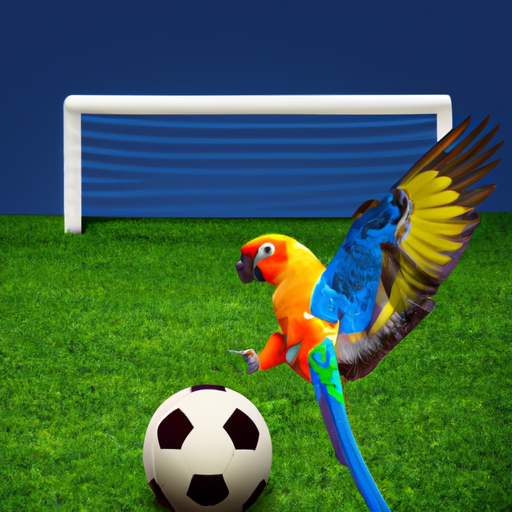

which can be used to retrieve the generated image of a parrot playing soccer.



In [ ]:
show_output(output=output['output'])

In [60]:
output = mrkl.invoke("How would you visualize an eagle flying inside the Sport Lisboa and Benfica Stadium?")



> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image based on the given prompt.
Action: generate_image
Action Input: "An eagle soaring through the air inside the Sport Lisboa and Benfica Stadium, with the team's logo prominently displayed in the background."
Observation: 5B97F286-2840-480D-80BD-0C852DB09083
Thought: I should use the generated UUID to retrieve the image.
Action: Retrieve image
Action Input: 5B97F286-2840-480D-80BD-0C852DB09083
Observation: Retrieve image is not a valid tool, try one of [generate_image].
Thought: I should use the generate_image tool to create an image based on the given prompt.
Action: generate_image
Action Input: "An eagle soaring through the air inside the Sport Lisboa and Benfica Stadium, with the team's logo prominently displayed in the background."
Observation: F2BFDEAF-110B-45AA-9BFD-788F5E69276C
Thought: I should use the generated UUID to retrieve the image.
Action: Retrieve image
Action Input: F2BFDEAF-

In [61]:
output

{'input': 'How would you visualize an eagle flying inside the Sport Lisboa and Benfica Stadium?',
 'output': "The final answer is the UUID 33FC45B3-B557-4A96-8F1E-24A11A7503F2, which can be used to retrieve the image of an eagle flying inside the Sport Lisboa and Benfica Stadium with the team's logo in the background."}

The final answer is the UUID 



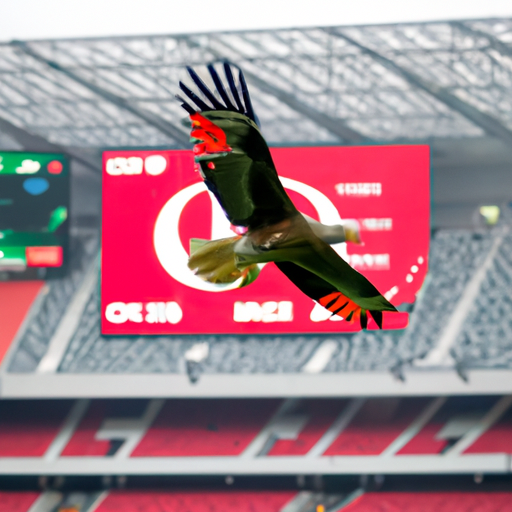

which can be used to retrieve the image of an eagle flying inside the Sport Lisboa and Benfica Stadium with the team's logo in the background.



In [62]:
show_output(output=output['output'])

## StableDiffusion

In [37]:
tools = [SteamshipImageGenerationTool(model_name="stable-diffusion", steamship_api_key=steamship_api_key)]

In [38]:
mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

In [ ]:
output = mrkl.run("How would you visualize a parot playing soccer?")

/opt/anaconda3/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot wearing a soccer jersey, kicking a soccer ball on a green field with a soccer goal in the background."
Observation: 1FF2F405-7748-410A-9A61-AEA31C68A58C
Thought: I should use the UUID to access the generated image.
Action: Access generated image
Action Input: 1FF2F405-7748-410A-9A61-AEA31C68A58C
Observation: Access generated image is not a valid tool, try one of [generate_image].
Thought: I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot wearing a soccer jersey, kicking a soccer ball on a green field with a soccer goal in the background."
Observation: 96FC2320-6C7C-4081-8B55-1F32764CF188
Thought: I should use the UUID to access the generated image.
Action: Access generated image
Action Input: 96FC2320-6C7C-4081-8B55-1F32764CF188
Observat

In [ ]:
output

'The UUID of the generated image is 629B41B6-8385-40AC-8D24-1B3EA2D818E7.'

The UUID of the generated image is 



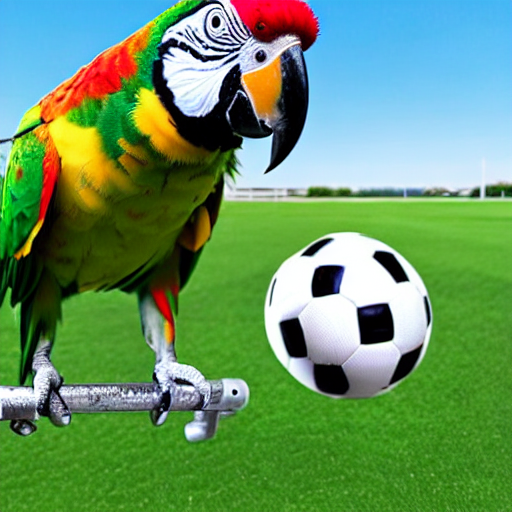

In [ ]:
show_output(output=output)

In [70]:
output = mrkl.run("How would you visualize an eagle flying inside the Sport Lisboa and Benfica Stadium?")



> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image based on the given prompt.
Action: generate_image
Action Input: "An eagle soaring through the air inside the Sport Lisboa and Benfica Stadium, with the team's logo prominently displayed in the background."
Observation: EEDBAF4C-42F5-46B2-B1CC-1E4DEC7AD485
Thought: I should use the UUID to retrieve the generated image.
Action: retrieve_image
Action Input: EEDBAF4C-42F5-46B2-B1CC-1E4DEC7AD485
Observation: retrieve_image is not a valid tool, try one of [generate_image].
Thought: I can save the UUID and use it later to retrieve the image.
Action: save_UUID
Action Input: EEDBAF4C-42F5-46B2-B1CC-1E4DEC7AD485
Observation: save_UUID is not a valid tool, try one of [generate_image].
Thought: I can use the UUID to share the generated image with others.
Action: share_image
Action Input: EEDBAF4C-42F5-46B2-B1CC-1E4DEC7AD485
Observation: share_image is not a valid tool, try one of [generate_image].
Thou

In [71]:
output

'The UUID for the generated image of an eagle flying inside the Sport Lisboa and Benfica Stadium is EEDBAF4C-42F5-46B2-B1CC-1E4DEC7AD485.'

In [72]:
import re
from steamship import Steamship, Block
from PIL import Image
from IPython.display import display
import io


def show_output(output):
    """Display the multi-modal output from the agent."""
    UUID_PATTERN = re.compile(
        r"([0-9A-Za-z]{8}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{12})"
    )

    outputs = UUID_PATTERN.split(output)
    outputs = [re.sub(r"^\W+", "", el) for el in outputs]

    for output in outputs:
        maybe_block_id = UUID_PATTERN.search(output)
        if maybe_block_id:

            block = Block.get(client=Steamship(api_key=steamship_api_key), _id=maybe_block_id.group())
            image_data = block.raw()
            image = Image.open(io.BytesIO(image_data))
            display(image)
        else:
            print(output, end="\n\n")

The UUID for the generated image of an eagle flying inside the Sport Lisboa and Benfica Stadium is 



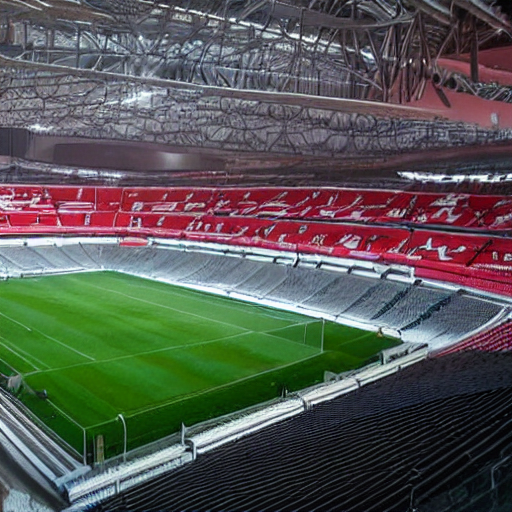

In [73]:
show_output(output=output)

In [ ]:
!pip install transformers

In [ ]:
!pip install pytorch torchvision
!pip install diffusers invisible-watermark
!pip install -e .

In [15]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16")
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from runwayml/stable-diffusion-v1-5 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/ded79e214aa69e42c24d3f5ac14b76d568679cc2/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/ded79e214aa69e42c24d3f5ac14b76d568679cc2/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/ded79e214aa69e42c24d3f5ac14b76d568679cc2/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwa

  0%|          | 0/50 [00:00<?, ?it/s]

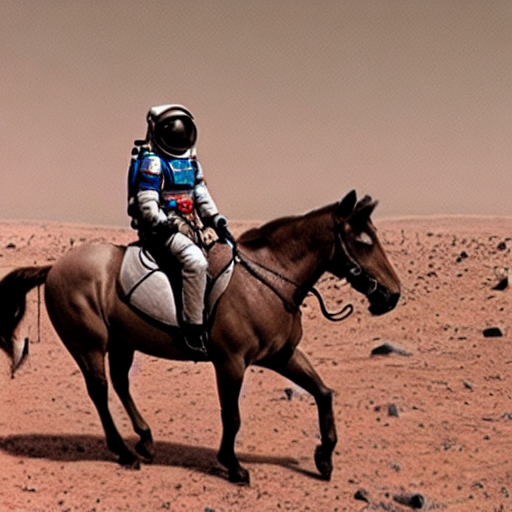

In [16]:
image

  0%|          | 0/50 [00:00<?, ?it/s]

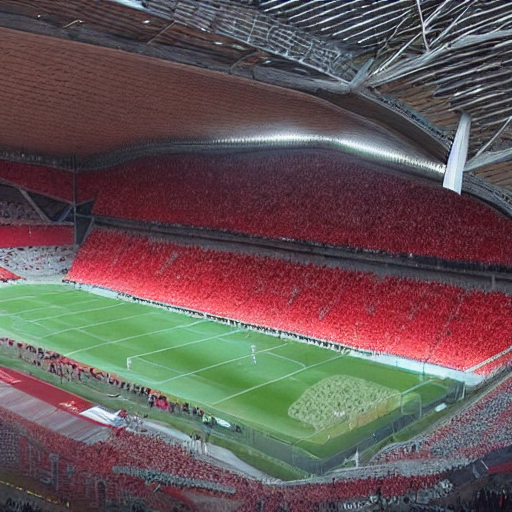

In [19]:
prompt = "An eagle flying inside the Sport Lisboa and Benfica Stadium"
image = pipe(prompt).images[0]

image